In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from utils.data import load_tc_data
from utils.plot import make_cmap
import cftime as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from numpy import inf
from scipy.stats import gaussian_kde
import matplotlib.colors as mcolors
from scipy import stats

In [2]:
data = np.load('/user/home/al18709/work/ke_track_rain/lr/canesm_hist_pred.npy')

In [3]:
print(data.shape)

(362754, 10, 10, 2)


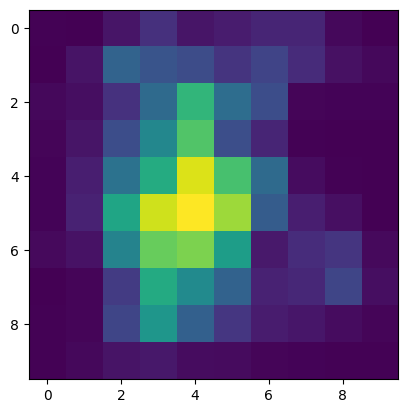

In [4]:
plt.imshow(data[30000,:,:,1])

In [5]:
data = pd.read_csv(f'/user/home/al18709/work/ke_track_inputs/canesm_hist_tracks.csv')

In [6]:
data2 = np.load(f'/user/home/al18709/work/ke_track_inputs/canesm_hist_tracks.npy')

In [7]:
data

,sid,year,month,day,hour,lat,lon,v,shear,rh,u850,v850,p
0,canesm-hist-19351-1979,1979,2,15,6,-12.103,347.232,12.12625,2.73,43.21,0.03,3.33,1008.75
1,canesm-hist-19351-1979,1979,2,15,8,-12.015,347.163,12.21086,2.99,43.86,0.37,3.62,1008.80
2,canesm-hist-19351-1979,1979,2,15,10,-11.918,347.096,12.49463,3.37,44.58,0.65,3.84,1008.77
3,canesm-hist-19351-1979,1979,2,15,12,-11.813,347.029,12.95044,3.79,45.36,0.87,4.03,1008.69
4,canesm-hist-19351-1979,1979,2,15,14,-11.701,346.961,13.51425,4.21,46.20,1.01,4.21,1008.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362749,canesm-hist-24750-2014,2014,7,12,20,27.716,210.059,30.00871,29.20,15.82,-11.05,-1.42,1005.59
362750,canesm-hist-24750-2014,2014,7,12,22,28.095,209.771,29.58454,29.30,16.58,-11.58,-1.02,1005.73
362751,canesm-hist-24750-2014,2014,7,13,0,28.485,209.469,29.13359,29.83,17.01,-12.35,-0.90,1005.86
362752,canesm-hist-24750-2014,2014,7,13,2,28.883,209.148,28.77378,30.13,17.93,-12.77,-0.63,1005.98


In [8]:
print(data2.shape)

(362754, 6)


In [9]:

inputs = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/valid_X.npy')
training_inputs = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/train_X.npy')


In [10]:
# # for model in ['canesm','cnrm6','ecearth6','ipsl6','miroc6','mpi6','mri6','ukmo'][0]:
# for model in ['canesm','cnrm6','ecearth6','miroc6','mpi6']:
# 	for scenario in ['hist','ssp245','ssp585']:
# 		# globals()[f'{model}_topography_{scenario}'] = np.load(f'/user/home/al18709/work/ke_track_inputs/{model}_{scenario}_topography.npy')
# 		print(model,scenario)
# 		globals()[f'{model}_tracks_{scenario}'] = np.load(f'/user/home/al18709/work/ke_track_inputs/{model}_{scenario}_tracks.npy')

for model in ['canesm','cnrm6','ecearth6','ipsl6','miroc6','mpi6','mri6','ukmo']:
	for scenario in ['hist','ssp245','ssp585']:
		# globals()[f'{model}_topography_{scenario}'] = np.load(f'/user/home/al18709/work/ke_track_inputs/{model}_{scenario}_topography.npy')
		print(model,scenario)
		data = pd.read_csv(f'/user/home/al18709/work/ke_track_inputs/{model}_{scenario}_tracks.csv')
		data['p'] = data['p'] * 100
		data.lon[data.lon > 180] = data.lon[data.lon >180] - 360
		globals()[f'{model}_tracks_{scenario}'] = data



canesm hist


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


canesm ssp245


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


canesm ssp585


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


cnrm6 hist


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


cnrm6 ssp245


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


cnrm6 ssp585


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


ecearth6 hist


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


ecearth6 ssp245


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


ecearth6 ssp585


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


ipsl6 hist


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


ipsl6 ssp245


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


ipsl6 ssp585


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


miroc6 hist


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360
/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


miroc6 ssp245
miroc6 ssp585


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


mpi6 hist


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


mpi6 ssp245


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


mpi6 ssp585


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


mri6 hist


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


mri6 ssp245


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


mri6 ssp585


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


ukmo hist


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


ukmo ssp245


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


ukmo ssp585


/tmp/ipykernel_4536/609176015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.lon[data.lon > 180] = data.lon[data.lon >180] - 360


In [11]:
canesm_tracks_ssp585


,sid,year,month,day,hour,lat,lon,v,shear,rh,u850,v850,p
0,canesm-ssp585-10802-2069,2069,10,28,0,12.257,-162.997,14.35450,3.29,52.41,1.20,5.72,100852.0
1,canesm-ssp585-10802-2069,2069,10,28,2,12.474,-162.985,14.21011,3.27,51.90,1.05,5.45,100855.0
2,canesm-ssp585-10802-2069,2069,10,28,4,12.687,-162.975,14.38401,3.42,51.38,0.70,5.22,100846.0
3,canesm-ssp585-10802-2069,2069,10,28,6,12.896,-162.979,14.73425,3.71,50.81,0.09,5.06,100828.0
4,canesm-ssp585-10802-2069,2069,10,28,8,13.101,-162.996,15.17952,4.01,50.21,-0.46,4.86,100806.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389074,canesm-ssp585-17200-2100,2100,10,10,18,41.728,143.651,44.45006,45.04,43.77,-14.82,4.00,100269.0
389075,canesm-ssp585-17200-2100,2100,10,10,20,42.223,143.623,43.24438,46.26,42.87,-15.28,2.49,100250.0
389076,canesm-ssp585-17200-2100,2100,10,10,22,42.690,143.579,39.77075,47.43,41.99,-15.72,0.91,100336.0
389077,canesm-ssp585-17200-2100,2100,10,11,0,43.126,143.523,35.39273,49.06,41.20,-16.17,-0.80,100443.0


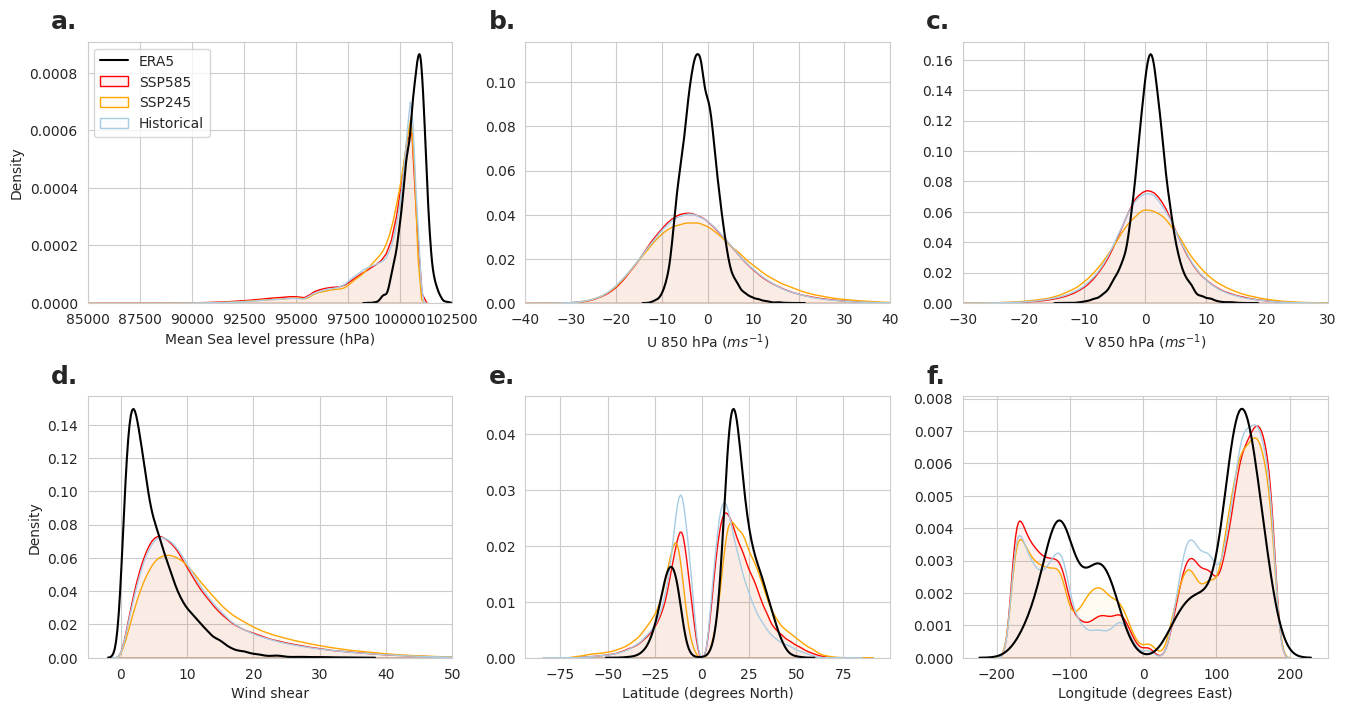

In [12]:
sns.set_style("whitegrid")  # You can change the style to your preference
height_ratios = [1,0.08,1]
fig, axes = plt.subplots(3, 3, figsize=(16, 8),gridspec_kw={'height_ratios': height_ratios})
titles = ['Mean Sea level pressure (hPa)', 'U 850 hPa ($ms^{-1}$)', 'V 850 hPa ($ms^{-1}$)', 'Wind shear', 'Latitude (degrees North)', 'Longitude (degrees East)']
labels = ['a.','b.','c.','d.','e.','f.']
columns = ['p','u850','v850','shear','lat','lon']
for i in range(6):
    row, col = divmod(i, 3)
    
    if row == 1:
        # axes[row,col].set_facecolor('white')
        # axes[row,col] = 'off'
        axes[row,col].set_axis_off()
        row = 2
    # sns.kdeplot(canesm_tracks_hist[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    # sns.kdeplot(cnrm6_tracks_hist[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    # sns.kdeplot(ecearth6_tracks_hist[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    # # sns.kdeplot(ipsl6_tracks_hist[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    # sns.kdeplot(miroc6_tracks_hist[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    # sns.kdeplot(mpi6_tracks_hist[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    sns.kdeplot(inputs[:,i],fill=False, color="Black", ax=axes[row,col])
    sns.kdeplot(np.concatenate((ipsl6_tracks_ssp585[columns[i]],canesm_tracks_ssp585[columns[i]],cnrm6_tracks_ssp585[columns[i]],ecearth6_tracks_ssp585[columns[i]],miroc6_tracks_ssp585[columns[i]],mpi6_tracks_ssp585[columns[i]],mri6_tracks_ssp585[columns[i]])), fill=True,alpha=0.05 ,color="Red", ax=axes[row,col])
    sns.kdeplot(np.concatenate((ipsl6_tracks_ssp245[columns[i]],canesm_tracks_ssp245[columns[i]],cnrm6_tracks_ssp245[columns[i]],ecearth6_tracks_ssp245[columns[i]],miroc6_tracks_ssp245[columns[i]],mpi6_tracks_ssp245[columns[i]],mri6_tracks_ssp245[columns[i]])), fill=True,alpha=0.05 ,color="Orange", ax=axes[row,col])

    sns.kdeplot(np.concatenate((ipsl6_tracks_hist[columns[i]],canesm_tracks_hist[columns[i]],cnrm6_tracks_hist[columns[i]],ecearth6_tracks_hist[columns[i]],miroc6_tracks_hist[columns[i]],mpi6_tracks_hist[columns[i]],mri6_tracks_hist[columns[i]])), fill=True,alpha=0.05, color="#A8CCE3", ax=axes[row,col])
    
    # sns.kdeplot(canesm_tracks_ssp245[:,i], fill=True, color="Orange", ax=axes[row,col])
    # sns.kdeplot(cnrm6_tracks_ssp245[:,i], fill=True, color="Orange", ax=axes[row,col])
    # sns.kdeplot(ecearth6_tracks_ssp245[:,i], fill=True, color="Orange", ax=axes[row,col])
    # # sns.kdeplot(ipsl6_tracks_ssp245[:,i], fill=True, color="Orange", ax=axes[row,col])
    # sns.kdeplot(miroc6_tracks_ssp245[:,i], fill=True, color="Orange", ax=axes[row,col])
    # sns.kdeplot(mpi6_tracks_ssp245[:,i], fill=True, color="Orange", ax=axes[row,col])

    
    # sns.kdeplot(canesm_tracks_ssp585[:,i], fill=True, color="Red", ax=axes[row,col])
    # sns.kdeplot(cnrm6_tracks_ssp585[:,i], fill=True, color="Red", ax=axes[row,col])
    # sns.kdeplot(ecearth6_tracks_ssp585[:,i], fill=True, color="Red", ax=axes[row,col])
    # # sns.kdeplot(ipsl6_tracks_ssp585[:,i], fill=True, color="Red", ax=axes[row,col])
    # sns.kdeplot(miroc6_tracks_ssp585[:,i], fill=True, color="Red", ax=axes[row,col])
    # sns.kdeplot(mpi6_tracks_ssp585[:,i], fill=True, color="Red", ax=axes[row,col])

    
    # if i == 0:
    #     tracks_hist[:,i] = tracks_hist[:,i] * 100
    #     tracks_ssp245[:,i] = tracks_ssp245[:,i] * 100
    #     tracks_585[:,i] = tracks_585[:,i] * 100
    # sns.kdeplot(tracks_585[:,i], fill=True, color="#204587", ax=axes[row,col])
    
    axes[row,col].text(-0.1, 1.05, labels[i], transform=axes[row,col].transAxes, size=18, weight='bold')
    # axes[row,col].set_title(titles[i])
    axes[row,col].set_xlabel(titles[i])
    axes[row,col].set_ylabel("")
    
axes[0,0].set_ylabel('Density')
axes[2,0].set_ylabel('Density')
axes[0,0].set_xlim(85000,102500)
axes[0,1].set_xlim(-40,40)
axes[0,2].set_xlim(-30,30)
axes[2,0].set_xlim(-5,50)
# plt.title("Kernel Density Estimation (KDE) Plot")
# plt.xlabel("Values")
# plt.ylabel("Density")
# plt.show()
axes[0,0].legend(['ERA5','SSP585','SSP245','Historical'])
plt.savefig('figure_11a_inputs.png',bbox_inches='tight',dpi=600)

# Reminder that this is based on ERA5 input data, so not necessarily 100% accurate. ERA5 is easy to work with but is 
# still a reanalysis product and therefore will still have some bias especially with U and V

In [17]:
for i in range(6):
    # row, col = divmod(i, 3)
    print(titles[i])
    data_ssp585 = np.concatenate((canesm_tracks_ssp585[:,i],cnrm6_tracks_ssp585[:,i],ecearth6_tracks_ssp585[:,i],miroc6_tracks_ssp585[:,i],mpi6_tracks_ssp585[:,i]))
    data_ssp245 = np.concatenate((canesm_tracks_ssp245[:,i],cnrm6_tracks_ssp245[:,i],ecearth6_tracks_ssp245[:,i],miroc6_tracks_ssp245[:,i],mpi6_tracks_ssp245[:,i]))
    data_hist = np.concatenate((canesm_tracks_hist[:,i],cnrm6_tracks_hist[:,i],ecearth6_tracks_hist[:,i],miroc6_tracks_hist[:,i],mpi6_tracks_hist[:,i]))
    

    # 1. Kolmogorov-Smirnov Test
    ks_statistic, ks_p_value = stats.ks_2samp(data_hist, data_ssp245)
    print(f"Kolmogorov-Smirnov Test: Statistic = {ks_statistic}, p-value = {ks_p_value}")
    ks_statistic, ks_p_value = stats.ks_2samp(data_hist, data_ssp585)
    print(f"Kolmogorov-Smirnov Test: Statistic = {ks_statistic}, p-value = {ks_p_value}")
    ks_statistic, ks_p_value = stats.ks_2samp(data_ssp585, data_ssp245)
    print(f"Kolmogorov-Smirnov Test: Statistic = {ks_statistic}, p-value = {ks_p_value}")

    # 2. Anderson-Darling Test
    ad_statistic, ad_critical_values, ad_significance_levels = stats.anderson_ksamp([data_hist, data_ssp245,data_ssp585])
    print(f"Anderson-Darling Test: Statistic = {ad_statistic}")

    # 3. Cramér-von Mises Test
    # cvm_statistic, cvm_p_value = stats.cramervonmises(data1, data2)
    # print(f"Cramér-von Mises Test: Statistic = {cvm_statistic}, p-value = {cvm_p_value}")


Mean Sea level pressure (hPa)


Kolmogorov-Smirnov Test: Statistic = 0.04805487343167558, p-value = 0.0
Kolmogorov-Smirnov Test: Statistic = 0.6441851149409772, p-value = 0.0
Kolmogorov-Smirnov Test: Statistic = 0.657714653969576, p-value = 0.0
Anderson-Darling Test: Statistic = 443515.5859604739
U 850 hPa ($ms^{-1}$)


/tmp/ipykernel_195920/1332396074.py:18: UserWarning: p-value floored: true value smaller than 0.001
  ad_statistic, ad_critical_values, ad_significance_levels = stats.anderson_ksamp([data_hist, data_ssp245,data_ssp585])


Kolmogorov-Smirnov Test: Statistic = 0.04333506109748886, p-value = 0.0
Kolmogorov-Smirnov Test: Statistic = 0.025132485900801638, p-value = 3.089970447781369e-272
Kolmogorov-Smirnov Test: Statistic = 0.05472265744144922, p-value = 0.0
Anderson-Darling Test: Statistic = 4802.444951279441
V 850 hPa ($ms^{-1}$)
Kolmogorov-Smirnov Test: Statistic = 0.04588251291006906, p-value = 0.0
Kolmogorov-Smirnov Test: Statistic = 0.04261293529527277, p-value = 0.0
Kolmogorov-Smirnov Test: Statistic = 0.059289716553618865, p-value = 0.0
Anderson-Darling Test: Statistic = 6325.124528618582
Wind shear
Kolmogorov-Smirnov Test: Statistic = 0.08309499312604562, p-value = 0.0
Kolmogorov-Smirnov Test: Statistic = 0.10812776239404864, p-value = 0.0
Kolmogorov-Smirnov Test: Statistic = 0.19081369878359422, p-value = 0.0
Anderson-Darling Test: Statistic = 40328.867421241186
Latitude (degrees North)
Kolmogorov-Smirnov Test: Statistic = 0.18474952000566347, p-value = 0.0
Kolmogorov-Smirnov Test: Statistic = 0.07

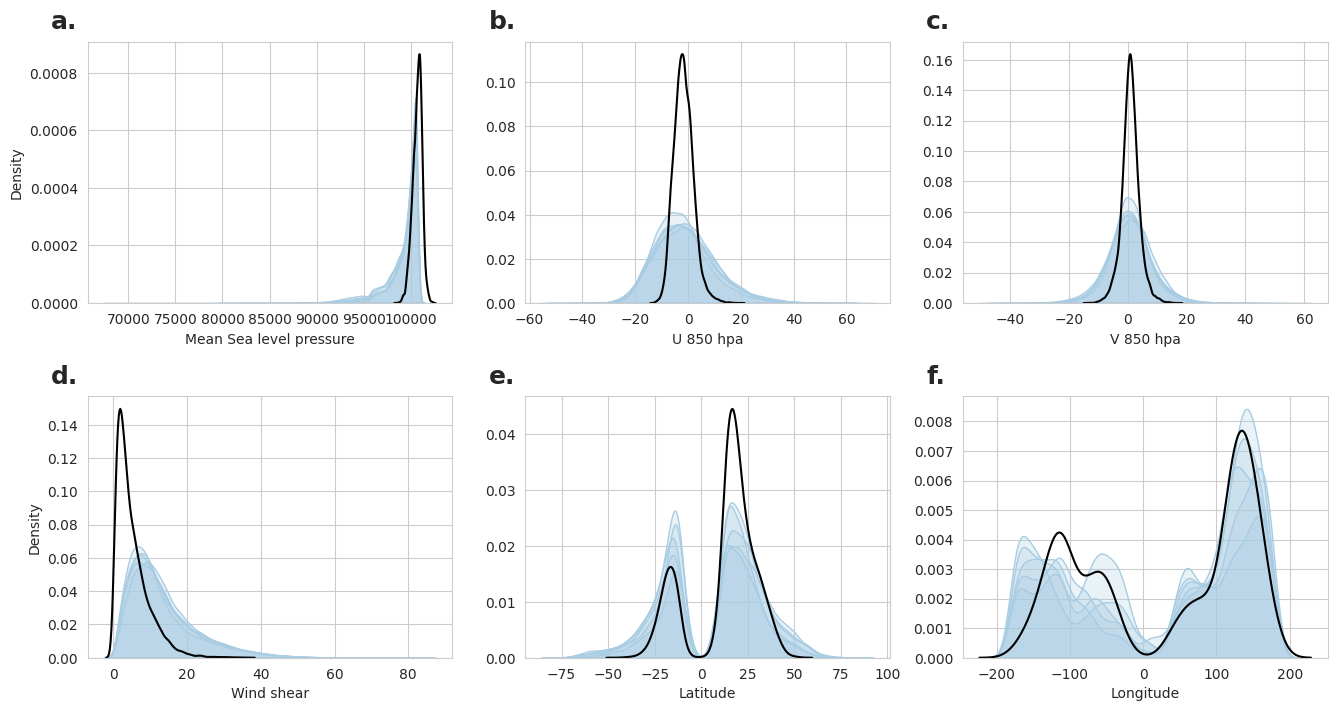

In [ ]:
sns.set_style("whitegrid")  # You can change the style to your preference
height_ratios = [1,0.08,1]
fig, axes = plt.subplots(3, 3, figsize=(16, 8),gridspec_kw={'height_ratios': height_ratios})
titles = ['Mean Sea level pressure', 'U 850 hpa', 'V 850 hpa', 'Wind shear', 'Latitude', 'Longitude']
labels = ['a.','b.','c.','d.','e.','f.']

for i in range(6):
    row, col = divmod(i, 3)
    
    if row == 1:
        # axes[row,col].set_facecolor('white')
        # axes[row,col] = 'off'
        axes[row,col].set_axis_off()
        row = 2
    sns.kdeplot(canesm_tracks_ssp245[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    sns.kdeplot(cnrm6_tracks_ssp245[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    sns.kdeplot(ecearth6_tracks_ssp245[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    # sns.kdeplot(ipsl6_tracks_ssp245[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    sns.kdeplot(miroc6_tracks_ssp245[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    sns.kdeplot(mpi6_tracks_ssp245[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    # sns.kdeplot(p_20[:,i], fill=True, color="#98B5D9", ax=axes[row,col])
    # sns.kdeplot(p_30[:,i], fill=True, color="#89A0CF", ax=axes[row,col])
    # sns.kdeplot(p_40[:,i], fill=True, color="#799AC5", ax=axes[row,col])
    # sns.kdeplot(p_50[:,i], fill=True, color="#6A88BB", ax=axes[row,col])
    # sns.kdeplot(tracks_ssp245[:,i], fill=True, color="#5B78B0", ax=axes[row,col])
    # sns.kdeplot(p_70[:,i], fill=True, color="#4C67A6", ax=axes[row,col])
    # sns.kdeplot(p_80[:,i], fill=True, color="#3E579C", ax=axes[row,col])
    # sns.kdeplot(p_90[:,i], fill=True, color="#2F4792", ax=axes[row,col])
    # if i == 0:
    #     tracks_hist[:,i] = tracks_hist[:,i] * 100
    #     tracks_ssp245[:,i] = tracks_ssp245[:,i] * 100
    #     tracks_585[:,i] = tracks_585[:,i] * 100
    # sns.kdeplot(tracks_585[:,i], fill=True, color="#204587", ax=axes[row,col])
    sns.kdeplot(inputs[:,i],fill=False, color="Black", ax=axes[row,col])
    axes[row,col].text(-0.1, 1.05, labels[i], transform=axes[row,col].transAxes, size=18, weight='bold')
    # axes[row,col].set_title(titles[i])
    axes[row,col].set_xlabel(titles[i])
    axes[row,col].set_ylabel("")
    
axes[0,0].set_ylabel('Density')
axes[2,0].set_ylabel('Density')
# plt.title("Kernel Density Estimation (KDE) Plot")
# plt.xlabel("Values")
# plt.ylabel("Density")
# plt.show()
plt.savefig('figure_11a_inputs.png',bbox_inches='tight',dpi=600)

# Reminder that this is based on ERA5 input data, so not necessarily 100% accurate. ERA5 is easy to work with but is 
# still a reanalysis product and therefore will still have some bias especially with U and V

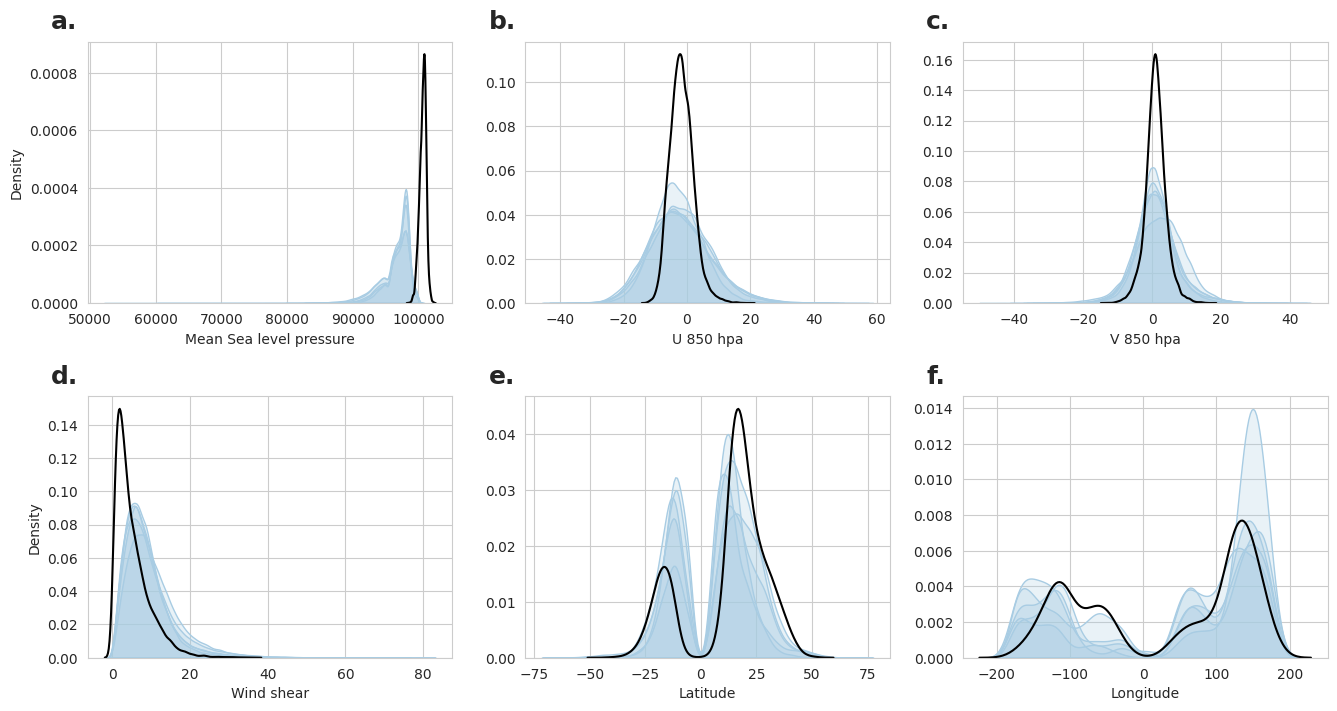

In [ ]:
sns.set_style("whitegrid")  # You can change the style to your preference
height_ratios = [1,0.08,1]
fig, axes = plt.subplots(3, 3, figsize=(16, 8),gridspec_kw={'height_ratios': height_ratios})
titles = ['Mean Sea level pressure', 'U 850 hpa', 'V 850 hpa', 'Wind shear', 'Latitude', 'Longitude']
labels = ['a.','b.','c.','d.','e.','f.']

for i in range(6):
    row, col = divmod(i, 3)
    
    if row == 1:
        # axes[row,col].set_facecolor('white')
        # axes[row,col] = 'off'
        axes[row,col].set_axis_off()
        row = 2
    sns.kdeplot(canesm_tracks_ssp585[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    sns.kdeplot(cnrm6_tracks_ssp585[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    sns.kdeplot(ecearth6_tracks_ssp585[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    # sns.kdeplot(ipsl6_tracks_ssp585[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    sns.kdeplot(miroc6_tracks_ssp585[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    sns.kdeplot(mpi6_tracks_ssp585[:,i], fill=True, color="#A8CCE3", ax=axes[row,col])
    # sns.kdeplot(p_20[:,i], fill=True, color="#98B5D9", ax=axes[row,col])
    # sns.kdeplot(p_30[:,i], fill=True, color="#89A0CF", ax=axes[row,col])
    # sns.kdeplot(p_40[:,i], fill=True, color="#799AC5", ax=axes[row,col])
    # sns.kdeplot(p_50[:,i], fill=True, color="#6A88BB", ax=axes[row,col])
    # sns.kdeplot(tracks_ssp245[:,i], fill=True, color="#5B78B0", ax=axes[row,col])
    # sns.kdeplot(p_70[:,i], fill=True, color="#4C67A6", ax=axes[row,col])
    # sns.kdeplot(p_80[:,i], fill=True, color="#3E579C", ax=axes[row,col])
    # sns.kdeplot(p_90[:,i], fill=True, color="#2F4792", ax=axes[row,col])
    # if i == 0:
    #     tracks_hist[:,i] = tracks_hist[:,i] * 100
    #     tracks_ssp245[:,i] = tracks_ssp245[:,i] * 100
    #     tracks_585[:,i] = tracks_585[:,i] * 100
    # sns.kdeplot(tracks_585[:,i], fill=True, color="#204587", ax=axes[row,col])
    sns.kdeplot(inputs[:,i],fill=False, color="Black", ax=axes[row,col])
    axes[row,col].text(-0.1, 1.05, labels[i], transform=axes[row,col].transAxes, size=18, weight='bold')
    # axes[row,col].set_title(titles[i])
    axes[row,col].set_xlabel(titles[i])
    axes[row,col].set_ylabel("")
    
axes[0,0].set_ylabel('Density')
axes[2,0].set_ylabel('Density')
# plt.title("Kernel Density Estimation (KDE) Plot")
# plt.xlabel("Values")
# plt.ylabel("Density")
# plt.show()
plt.savefig('figure_11a_inputs.png',bbox_inches='tight',dpi=600)

# Reminder that this is based on ERA5 input data, so not necessarily 100% accurate. ERA5 is easy to work with but is 
# still a reanalysis product and therefore will still have some bias especially with U and V

In [ ]:
# plot topography
from mpl_toolkits.mplot3d import Axes3D
print(cnrm_topography_hist.shape)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate data for the surface
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z_land = topography_hist[495,:,:]
z_ocean = topography_hist[0,:,:]

# Plot the surface
surface = ax.plot_surface(x, y, z_land, cmap='terrain',linewidth=0, antialiased=False, alpha=0.7)
# surface = ax.plot_surface(x, y, z_ocean, cmap='ocean',linewidth=0, antialiased=False, alpha=0.7)

ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 0.5, 1]))

# Customize the viewing angle
# ax.view_init(elev=25, azim=-35)
ax.view_init(elev=34, azim=60)

# Remove background
# Remove background and grid
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)
ax.set_axis_off()

# Add a color bar which maps values to colors
cbar = fig.colorbar(surface, shrink=0.5, aspect=20,pad=-0.82)
cbar.set_label('Elevation (m)', labelpad=-70)
cbar.outline.set_linewidth(0.5)
cbar.ax.tick_params(axis='both', which='both', width=0.5,labelsize=8)

# Show the plot

plt.savefig('figure_11b_topography.png',bbox_inches='tight',dpi=600)

NameError: name 'cnrm_topography_hist' is not defined

In [ ]:
print(tracks_hist[495,:])

[ 1.00487e+05 -1.01000e+01 -4.08000e+00  1.31200e+01  5.79190e+01
  1.42210e+02]


NameError: name 'p_10' is not defined

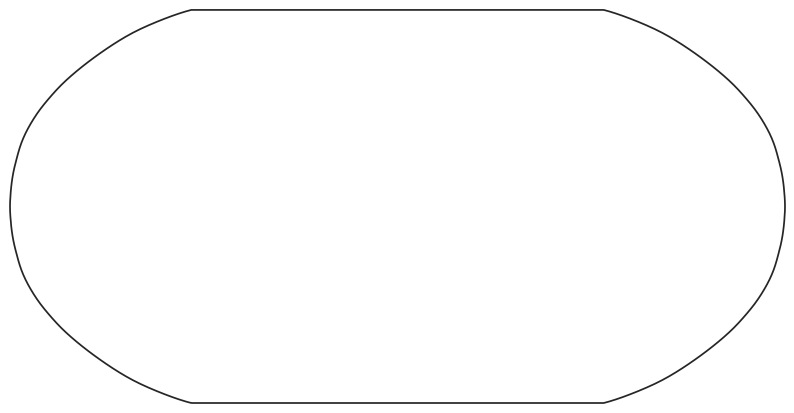

In [ ]:
levels = [10, 15, 20, 25, 30, 40, 50,75, 100,140,180,200,250,300]
sns.set_style("white")
sns.set_context("notebook")
vmin=-2
vmax=2


fig, ax = plt.subplots(figsize=(10, 20),subplot_kw={'projection': ccrs.Robinson()})

# ax.set_xlim([-180, 180])
# ax.set_ylim([-90, 90])

ax.scatter(p_10[:,5],p_10[:,4], color="#A8CCE3",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_20[:,5],p_20[:,4], color="#98B5D9",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_30[:,5],p_30[:,4], color="#89A0CF",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_40[:,5],p_40[:,4], color="#799AC5",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_50[:,5],p_50[:,4], color="#6A88BB",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_60[:,5],p_60[:,4], color="#5B78B0",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_70[:,5],p_70[:,4], color="#4C67A6",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_80[:,5],p_80[:,4], color="#3E579C",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_90[:,5],p_90[:,4], color="#2F4792",s=1,transform=ccrs.PlateCarree())
ax.scatter(p_100[:,5],p_100[:,4], color="#204587",s=1,transform=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE,linewidth=0.5)
ax.add_feature(cfeature.LAND, zorder=100,color='black',alpha=0.1)


# plt.contourf(storm.precipitation[0,:,:,0],storm.storm_lats[0,:,:],storm.storm_lons[0,:,:])


# ax.outline_patch.set_linewidth(0.5)
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
# 			linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xlabel_style = {'size': 14}
# gl.ylabel_style = {'size': 14}

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


ax.set_title('Storm distribution',fontsize=14,pad=15)
ax.set_global()
plt.savefig('figure_9c_storm_distribution_4.png')